In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import random
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle

All The Function Are Defined Here

In [ ]:
def normalise(arr):
    norm = np.linalg.norm(arr)
    arr = arr/norm  # normalized matrix
    return arr

def computation_cost(x, y, theta):
    m =len(y)
    diff = x.dot(theta) - y
    j = 1/(2 * m) * np.matmul(diff, diff)
    return j

def gradient_descent(x, y, theta, learning_rate, epochs):
    x = np.array(x)
    y = np.array(y)
    theta = np.array(theta)
    m = len(y)
    j_history = []
    hc = 0 
    theta_list = []
    v, b = x.shape
    for i in range(epochs):
        hc = x.dot(theta) - y
        theta -= learning_rate / m * x.T.dot(hc)
        j = computation_cost(x, y, theta)
        theta_list.append(sum(theta**2))
        j_history.append(j) 
    return theta, j_history, theta_list

    

def plot(x, y):
    plt.plot(x, y, color = 'r')
    plt.xlabel('iteration')
    plt.ylabel('cost_funtion')
    plt.show()
    
def mse(theta, x_test, y_test):
    m, n = x_test.shape
    y_pred =  x_test.dot(theta)
    y_pred_mean = sum((y_test - y_pred)**2) / m
    return y_pred_mean

def plot_hyper(x, y, theta):
    m , n =x.shape
    x1 = np.hstack(((np.ones([m, 1])), x))
    y_pred = x1.dot(theta)
    if n == 1:
        plt.scatter(x, y, color = 'r', label = 'actual_value')
        plt.plot(x, y_pred, color = 'b', label = 'calculated_value')
        plt.xlabel('input')
        plt.ylabel('ouput')
        plt.title('hyperplane')
        plt.show()
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_trisurf(x[:, 0], x[:, 1], y_pred, color = 'b', label = 'calculated_value')
        ax.scatter3D(x[:, 0], x[:, 1], y, color = 'r', label = 'actual_value')
        ax.view_init(elev=10, azim=60)
        plt.title('Hyperplane')
        plt.xlabel('input1')
        plt.ylabel('input2')
        ax.set_zlabel('output')
        plt.show
        
def direct_methord(x, y):
    theta = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return theta

def definechuncksk(dataset, k_value):
    m, n = dataset.shape
    number_of_folds = int(m / k_value)
    chuncks = [dataset[i:i+number_of_folds] for i in range(0,m,number_of_folds)]
    return chuncks

def kfold_train_test_generate(chunks,iteration_number):
    value = len(chunks)
    test_set = chunks[value - iteration_number]
    training_list = []
    for i in range(value):
        if (i != (value - iteration_number)):
            training_list.append(chuncks[i])
    train_set = pd.concat(training_list)
    training_x = train_set.iloc[:, :-1]
    training_y = train_set.iloc[:, -1]
    test_x = test_set.iloc[:, :-1]
    test_y = test_set.iloc[:, -1]
    return training_x, training_y, test_x, test_y


def stochastic_gradient_descent(x , y, theta, learning_rate, epochs, batch_size=100, random_state=None):
    x, y = np.array(x), np.array(y)
    j_history = []
    hc = 0
    theta_list = []
    tolerance = 0.0005

    
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)
    
    m, n = x.shape
    xy = np.c_[x.reshape(m, -1), y.reshape(m, 1)]
    j_sum = 0
    
    
    for _ in range(epochs):
        
        rng.shuffle(xy)
        
        for start in range(0, m, 10*batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1]
            hc = np.dot(x_batch, theta) - y_batch
            theta -= learning_rate / m * x_batch.T.dot(hc)
            j = computation_cost(x_batch, y_batch, theta)
            theta_list.append(sum(theta**2))
            j_history.append(j) 
    
        
        j_sum = sum(j_history)
            
        if np.all(np.abs(j_sum) <= tolerance):
            break

      
    return theta, j_history, theta_list
        
    

1. Analyze data1 and data2 using linear regression
(a) Plot J(w) against iteration.
(b) Plot J(w) against w for data1.
(c) Plot the hyperplane obtained. In the same figure, plot the output points also.
(d) Describe the cross validation techniques used.
(e) Report the average mean square error and standard deviation.
(f) Report the parameters of the model.

(d) the cross validation techinque used is hold out in which the dataset was divided into 70:30 for training and testing data and then the mean square error was calcuated respectivly. 

(a) J(w) against iteration


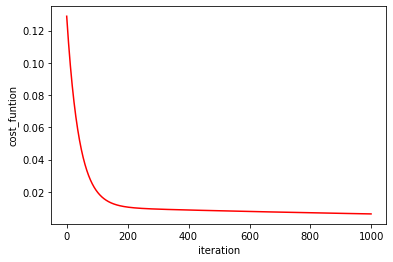

(b) J(w) against w


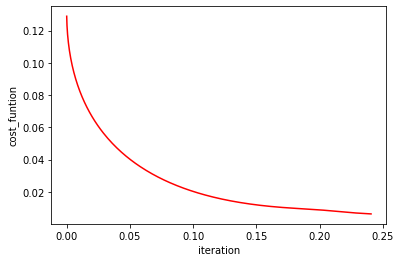

(c) the hyperplane obtained


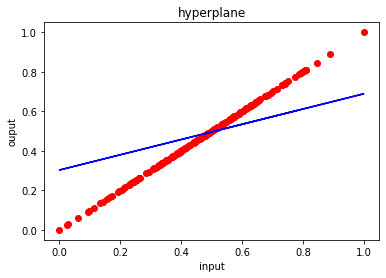

(e)the mean square error is: 0.011782982477365356
(e)the root mean sqaure error is: 0.005891491238682678
(w)the parameter w is: [2.9982694817077868e-05, 0.00011845498964893763, 0.00026325091719854176, 0.0004622667903795276, 0.0007134595595906097, 0.0010148452117528781, 0.0013644972100663097, 0.0017605449734676762, 0.0022011723947972578, 0.0026846163967063834, 0.0032091655243618074, 0.0037731585740263477, 0.00437498325661803, 0.00501307489537224, 0.005685915156753148, 0.006392030813781752, 0.007129992540968645, 0.007898413740059698, 0.008695949395822513, 0.009521294961120643, 0.01037318527054132, 0.011250393481860589, 0.012151730044647572, 0.013076041695326912, 0.014022210478035353, 0.014989152790624887, 0.01597581845518104, 0.016981189812440473, 0.018004280839507468, 0.019044136290283682, 0.020099830858040225, 0.021170468359575187, 0.022255180940413705, 0.023353128300521067, 0.024463496940012524, 0.025585499424356402, 0.026718373668579515, 0.02786138223999624, 0.0290138116789943, 0.030

In [ ]:
df = pd.read_csv("data1.csv")

for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

x = df.iloc[:, :-1].values 
y = df.iloc[:,-1].values
df = shuffle(df)


m, n = x.shape
x1 = np.hstack(((np.ones([m, 1])), x))

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 1/3, random_state = 0)

theta = np.zeros(n + 1)
learning_rate = 0.01
epochs = 1000
theta, j_history, theta_list = gradient_descent(x_train, y_train, theta, learning_rate, epochs)

print("(a) J(w) against iteration")
plot(range(epochs), j_history)
print("(b) J(w) against w")
plot(theta_list, j_history)

mse1 = mse(theta, x_test, y_test)
rmse1 = (mse1)**1/2

print("(c) the hyperplane obtained")
plot_hyper(x, y, theta)

print("(e)the mean square error is: {}".format(mse1))
print("(e)the root mean sqaure error is: {}".format(rmse1))
print("(w)the parameter w is: {}".format(theta_list))

(a) J(w) against iteration


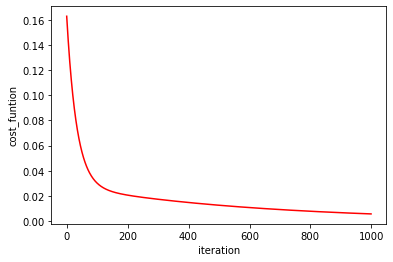

(b) J(w) against w


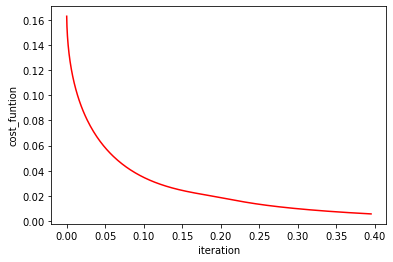

(c) the hyperplane obtained
(e)the mean square error is: 0.012314003453706498
(e)the root mean sqaure error is: 0.006157001726853249
(f)the parameter w is: [4.278318589841439e-05, 0.00016856457396883801, 0.00037359392747435093, 0.0006542535055362665, 0.0010070537682873582, 0.0014286292161942852, 0.0019157343594294344, 0.0024652398132978368, 0.0030741285158464686, 0.0037394920639011934, 0.004458527163891, 0.0052285321939300605, 0.006046903873735722, 0.0069111340390648, 0.007818806517451668, 0.008767594102129682, 0.00975525562111258, 0.010779633098504623, 0.011838649005197759, 0.012930303596200607, 0.014052672331928253, 0.015203903380863302, 0.016382215201077563, 0.01758589419818056, 0.01881329245733516, 0.020062825547052826, 0.021332970392550665, 0.022622263216520437, 0.023929297545225055, 0.025252722277902127, 0.02659123981751549, 0.02794360426095587, 0.029308619646849644, 0.030685138259191065, 0.03207205898506788, 0.033468325724803155, 0.03487292585288749, 0.0362848887281255, 0.037703

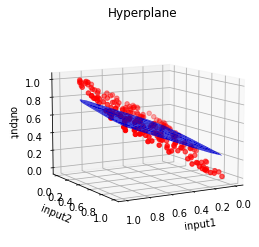

In [ ]:
df = pd.read_csv("data2.csv")

for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    
    
x = df.iloc[:, :-1].values 
y = df.iloc[:,-1].values

df = shuffle(df)


m, n = x.shape
x1 = np.hstack(((np.ones([m, 1])), x))

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 1/3, random_state = 0)

theta = np.zeros(n + 1)
learning_rate = 0.01
epochs = 1000
theta, j_history, theta_list = gradient_descent(x_train, y_train, theta, learning_rate, epochs)

print("(a) J(w) against iteration")
plot(range(epochs), j_history)

print("(b) J(w) against w")
plot(theta_list, j_history)

mse1 = mse(theta, x_test, y_test)
rmse1 = (mse1)**1/2

print("(c) the hyperplane obtained")
plot_hyper(x, y, theta)

print("(e)the mean square error is: {}".format(mse1))
print("(e)the root mean sqaure error is: {}".format(rmse1))
print("(f)the parameter w is: {}".format(theta_list))


2. Analyze data3 using linear regression 
(a) Find the parameters using direct method and iterative methods.
(b) Compare the time taken and space requirements of two approaches.
(c) Describe the search space and cross validation techniques used to find the values
    of the hyperparameters of the model.
(d) Report the values of the hyperparameters.
(e) Report the parameters of the model.

0.1 500


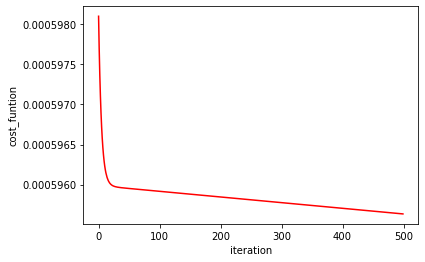

0.1 700


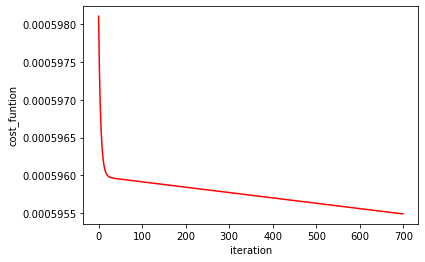

0.1 1000


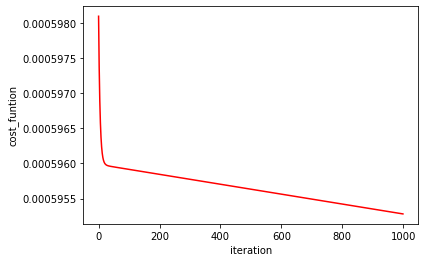

0.001 500


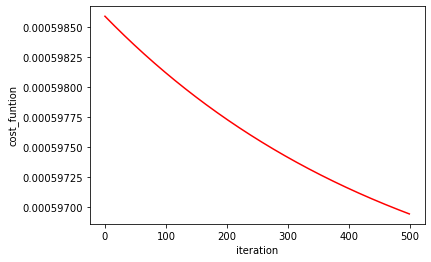

0.001 700


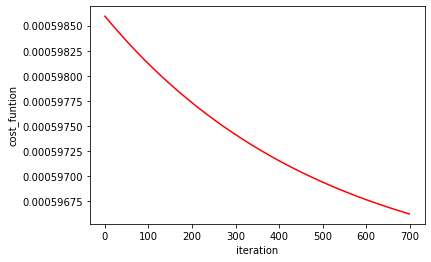

0.001 1000


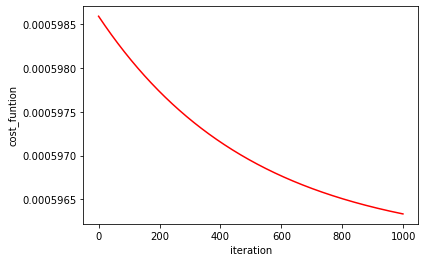

0.0001 500


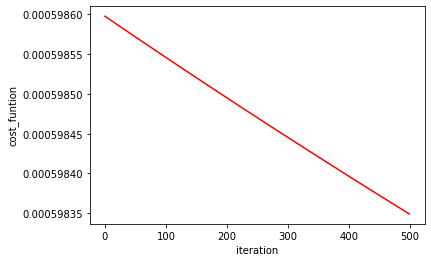

0.0001 700


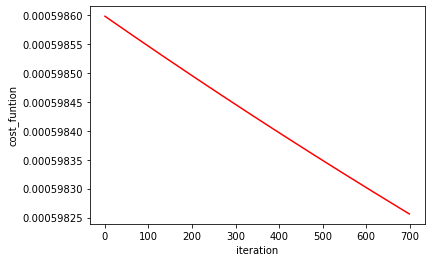

0.0001 1000


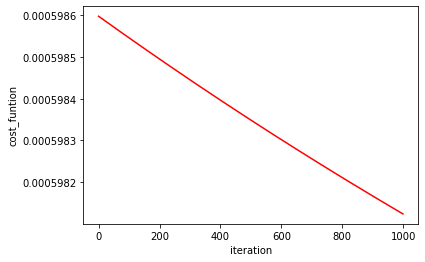

1 500


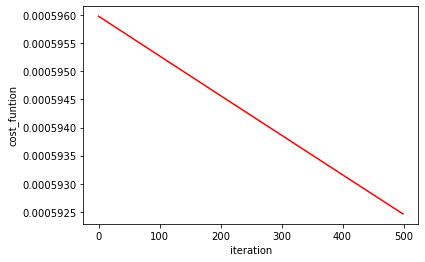

1 700


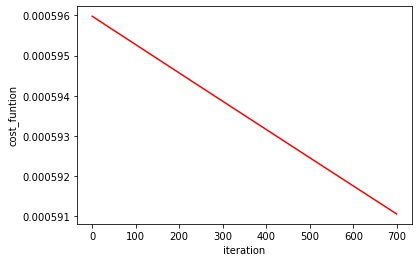

1 1000


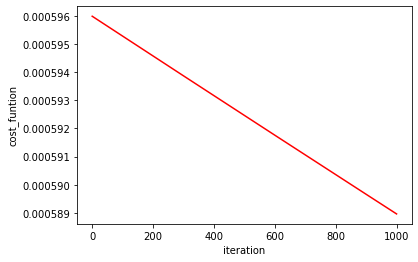

(a)the iterative method theta [ 2.40307870e-03 -8.45782662e-04 -2.45573373e-02 -1.61114926e-03
 -4.88314322e-03  2.00891647e-03  7.32776084e-04  6.97661986e-03
  2.49012968e-03  6.76027922e-04 -2.63149771e-03 -7.38963918e-03
 -1.39048778e-03  5.12466850e-03  5.70406735e-03 -1.95120082e-03
  1.29990291e-02  2.15017364e-03  1.33933664e-04  4.32785913e-03
 -7.63539424e-03  4.14053507e-03 -5.55897249e-03 -2.92507764e-03
  1.73594787e-04 -1.91747538e-03 -3.17826892e-03 -9.64984781e-03
  2.22083103e-03  3.19380640e-04 -2.57015792e-03  5.80630888e-03
  5.47758475e-03 -2.68314584e-03  4.20122179e-03 -6.50543279e-04
  8.46362330e-03  1.09841278e-03  3.49342558e-03 -6.72223243e-04
  7.85928902e-03 -5.71063976e-03  6.33772044e-03  1.78024032e-03
  6.12779281e-03  3.78306094e-03  3.53963471e-03 -4.53900519e-03
  3.49850784e-03  3.57301816e-04 -4.72383274e-03  5.28306415e-03
 -2.88132533e-03  4.39736470e-03  1.41145032e-02 -3.17422275e-03
  2.55578391e-03 -2.04668291e-03 -1.32654219e-03  4.06489300

In [ ]:
df = pd.read_csv("data3.csv")

x = df.iloc[:, :-1].values 
y = df.iloc[:,-1].values
df = shuffle(df)

x_norm = normalise(x)
y_norm = normalise(y)
m, n = x_norm.shape

x_norm1 = np.hstack(((np.ones([m, 1])), x_norm))

x_train, x_test, y_train, y_test = train_test_split(x_norm1, y_norm, test_size = 1/3, random_state = 0)

#things required to save search space
j_history_list = []
pointer = dict()
c_list = []
iter_list = []

start_time1 = time.time()
#direct methord
theta1 = direct_methord(x_train, y_train)
# print("the direct methord theta: {}".format(theta1))
end_time1 = time.time()
mse1 = mse(theta1, x_test, y_test)

#iterative_methord
start_time = time.time()
theta = np.zeros(n + 1)
for c in [0.1, 0.001, 0.0001, 1]:
    for iter1 in [500, 700, 1000]:
        theta2, j_history, theta_list = gradient_descent(x_train, y_train, theta, c, iter1)
        j_history_list.append(j_history[-1])
        c_list.append(c)
        iter_list.append(iter1)
        print(c, iter1)
        plot(range(iter1), j_history)
        
        
end_time = time.time()
mse2 = mse(theta2, x_test, y_test)

# storing the value of the c and iter
pointer['c'] = c_list
pointer['iter'] = iter_list
index = np.argmin(j_history_list)

print("(a)the iterative method theta {}".format(theta2))
print("(a)the direct method theta {}".format(theta1))
print("(b)the time required for iterative method: {} and for direct method: {}".format(end_time - start_time, end_time1 - start_time1))
print("(d)the value for hyperparamters learning_rate: {}, iteration: {}".format(pointer['c'][index], pointer['iter'][index]))
print("(f)the mean square error for iterative method: {}".format(mse2))
print("(f)the mean square error for direct method: {}".format(mse1))


3. Analyze data4 using linear regression
(a) Describe the cross validation techniques used.
(b) Describe the method used to find the parameters.
(c) Report the values of the parameters of the model.
(d) Report the average mean square error and standard deviation.

(a) the cross validation techinque used is hold out in which the dataset was divided into 70:30 for training and testing data and then the mean square error was calcuated respectivly. 

(d) the methord used for finding the parameter is gradient descent. here we are using to minimise the function.

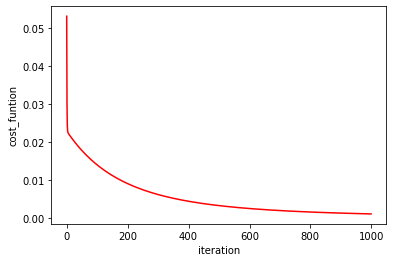

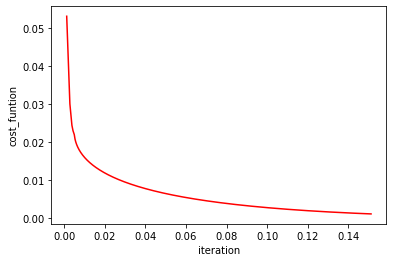

(c)the parameter w is: [0.0012844066391102464, 0.002853344505629156, 0.0038510376915549885, 0.00439919599558344, 0.004687284871199127, 0.00483928276753339, 0.004923398769989543, 0.004974834270864293, 0.00501125500522664, 0.005041408177943108, 0.005069593093338066, 0.00509791115724839, 0.005127382540862801, 0.005158496699561443, 0.005191482909325233, 0.005226443005880718, 0.005263416463308569, 0.005302412288135563, 0.005343424646942723, 0.005386440522595737, 0.005431443464631867, 0.00547841542597629, 0.005527337662087123, 0.005578191170763229, 0.005630956906917049, 0.00568561588710337, 0.005742149240042851, 0.005800538230692979, 0.005860764271364987, 0.005922808926499935, 0.005986653914343926, 0.006052281107109656, 0.006119672530401876, 0.006188810362287705, 0.006259676932198352, 0.006332254719753594, 0.0064065263535537246, 0.006482474609960871, 0.0065600824118803, 0.0066393328275468864, 0.006720209069319317, 0.006802694492483119, 0.006886772594063064, 0.006972427011645277, 0.0070596415

In [ ]:
df = pd.read_csv("data4.csv")

for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    
x = df.iloc[:, :-1].values 
y = df.iloc[:,-1].values
df = shuffle(df)

m, n = x.shape
x1 = np.hstack(((np.ones([m, 1])), x))

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 1/3, random_state = 0)

theta = np.zeros(n + 1)
learning_rate = 0.01
epochs = 1000
theta, j_history, theta_list = gradient_descent(x_train, y_train, theta, learning_rate, epochs)

plot(range(epochs), j_history)
plot(theta_list, j_history)

mse1 = mse(theta, x_test, y_test)
rmse1 = (mse1)**1/2

print("(c)the parameter w is: {}".format(theta_list))
print("(d)the mean square error is: {}".format(mse1))
print("(d)the root mean sqaure error is: {}".format(rmse1))


# plot_hyper(x_norm, y_norm, theta)

4. Analyze Wine quality data set using linear regression (download data from UCI web
repository)
(a) Analyze the data with normalization and without normalization.
(b) Describe how you applied normalization techniques on training and testing data.
(c) Apply k fold cross validation and hold out method.
(d) Assess the performance of the model.
(e) Report search space & the values of the hyperparameters and the parameters of
the model.

(b) i have normailised the entire dataset with the minimum and maximum of each column.
(c) applied both k fold and hold out.


In [ ]:
df = pd.read_csv("winequality-red.csv", delimiter = ';')

df = shuffle(df)

m,n = df.shape
print(m)
print(n)

df_norm = df
for col in df.columns:
    df_norm[col] = (df_norm[col] - df_norm[col].min()) / (df_norm[col].max() - df_norm[col].min())

k_value = 10
chuncks = definechuncksk(df_norm, k_value)

#k-fold methord
iteration_number_list = []
for i in range(10):
    iteration_number_list.append(random.randint(1,len(chuncks) - 1))
theta_net = []
jw_net = []
jw_net_stochastic = []
mse_stochastic = []
mse1 = []
mse_list = []
learning_rate = 0.01
epochs = 1000
for i in iteration_number_list:
    x_train, y_train, x_test, y_test = kfold_train_test_generate(chuncks, i)
#     print("the x_train {}, x_test {}".format(x_train, x_test))
    m, n = x_train.shape
    x_train = np.hstack(((np.ones([m, 1])), x_train))
    m1, n1 = x_test.shape
    x_test = np.hstack(((np.ones([m1, 1])), x_test))
    theta = np.zeros(n + 1)
    
    # gradient descent algo
    theta1, j_history, theta_list = gradient_descent(x_train, y_train, theta, learning_rate, epochs)
    jw_net.append(j_history)
    mse1.append(mse(theta1, x_test, y_test))
    
    # stochastic gradient descent algo
    theta2, j_history_stochastic, theta_list_stochastic = stochastic_gradient_descent(x_train , y_train , theta, learning_rate, epochs)
    jw_net_stochastic.append(j_history_stochastic)
    mse_stochastic.append(mse(theta2, x_test, y_test))

# for  gradent descent algo avg Mean square error in case of k fold
avg_mse = sum(mse1) / len(mse1)
jw_net_net =[x / len(jw_net) for x in [sum(i) for i in zip(*jw_net)]] 
print("The avg Mean square error in case of k fold (gradient descent): {}".format(avg_mse))

#for  stochastic descent algo avg Mean square error in case of k fold
avg_mse_stochastic = sum(mse_stochastic) / len(mse_stochastic)
jw_net_net_stochastic =[x / len(jw_net_stochastic) for x in [sum(i) for i in zip(*jw_net_stochastic)]] 
print("The avg Mean square error in case of k fold(stochastic gradient descent): {}".format(avg_mse_stochastic))


# hold out methord
x = df_norm.iloc[:, :-1].values 
y = df_norm.iloc[:,-1].values
df = shuffle(df)

m, n = x.shape
x1 = np.hstack(((np.ones([m, 1])), x))

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 1/3, random_state = 0)

theta = np.zeros(n + 1)
learning_rate = 0.01
epochs = 1000

start_time = time.time()
#using gradient descent
theta, j_history, theta_list = gradient_descent(x_train, y_train, theta, learning_rate, epochs)
end_time = time.time()

start_time_stochastic = time.time()
#using stochastic gradient descent 
theta2, j_history_stochastic, theta_list_stochastic = stochastic_gradient_descent(x_train , y_train , theta, learning_rate, epochs)
end_time_stochastic = time.time()




mse1 = mse(theta, x_test, y_test)
rmse1 = (mse1)**(1/2)
print()
print("the mean square error in case of hold out: {}".format(mse1))
print("the root mean sqaure error in case of hold out: {}".format(rmse1))
print()

mse_stochastic = mse(theta2, x_test, y_test)
rmse_stochastic = (mse_stochastic)**(1/2)
print("the mean square error in case of hold out (stochastic gradient): {}".format(mse_stochastic))
print("the root mean sqaure error in case of hold out (stochastic gradient): {}".format(rmse_stochastic))
print()

print("the time taken by holdout gradient descent {}".format(end_time - start_time))
print("the time taken by holdout stochastic gradient descent {}".format(end_time_stochastic - start_time_stochastic))
print()
print("the parameter w for k fold gradient: {}".format(theta_list))
print("the parameter w for k fold stochastic gradient: {}".format(theta_list_stochastic))
    



1599
12
The avg Mean square error in case of k fold (gradient descent): 0.021292109469710666
The avg Mean square error in case of k fold(stochastic gradient descent): 0.025593276989818448

the mean square error in case of hold out: 0.021233766762231796
the root mean sqaure error in case of hold out: 0.14571810718723943

the mean square error in case of hold out (stochastic gradient): 0.021233766762231796
the root mean sqaure error in case of hold out (stochastic gradient): 0.14571810718723943

the time taken by holdout gradient descent 0.06045722961425781
the time taken by holdout stochastic gradient descent 2.7878708839416504

